## RRT

In [16]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

(384, 683)


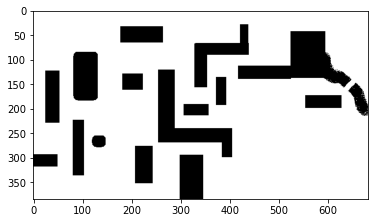

In [17]:
img = cv2.imread("world3.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
mapArray = thresh1.astype(np.int32)
print(mapArray.shape)
plt.imshow(img, cmap="gray")

In [18]:
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parent_x = []
        self.parent_y = []

In [19]:
def dist_and_angle(x1, y1, x2, y2):
    dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    angle = np.arctan2(y2 - y1, x2 - x1)
    return dist, angle

def collision(img, x1, y1, x2, y2):
    x = list(np.arange(x1, x2, (x2-x1)/100))
    y = list(((y2-y1)/(x2-x1)) * (x-x1) + y1)
    for xs, ys in zip(x,y):
        if img[int(ys)][int(xs)] == 0:
            return True
    return False

def check_collision(img, x1, y1, x2, y2, stepSize=10):
    hy, hx = img.shape
    _, theta = dist_and_angle(x2, y2, x1, y1)
    
    # next step point
    x = x2 + stepSize*np.cos(theta)
    y = y2 + stepSize*np.sin(theta)
    if y < 0 or y > hy or x < 0 or x > hx:
        directionCon = False
        nodeCon = False
    else:
        # Check direction connection
        # from current point to end
        if collision(img, x, y, end.x, end.y):
            directionCon = False
        else:
            directionCon = True
        
        # Check connection between next step point and last time step point 
        if collision(img, x ,y, x2, y2):
            nodeCon = False
        else:
            nodeCon = True
    return x, y, directionCon, nodeCon

def nearest_node(x, y):
    temp_dict = []
    for i in range(len(nodeList)):
        dist, _ = dist_and_angle(x, y, nodeList[i].x, nodeList[i].y)
        temp_dict.append(dist)
    return temp_dict.index(min(temp_dict))

def random_point(h, w):
    new_y = np.random.randint(0, h)
    new_x = np.random.randint(0, w)
    return new_x, new_y

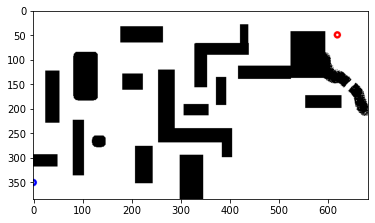

In [20]:
# Perform RRT
# map dimension
h, w, _ = img.shape

newImg = img.copy()

start = Node(0, 350)
start.parent_x.append(start.x)
start.parent_y.append(start.y)
# end = Node(w-1, h-1)
end = Node(620, 50)


nodeList = [start]

# mark the starting point and destination with blue cirlce and red circle respectively
cv2.circle(newImg, (start.x, start.y), 5, (0,0,255), thickness=3, lineType=8)
cv2.circle(newImg, (end.x, end.y), 5, (255, 0, 0), thickness=3, lineType=8)

plt.imshow(newImg)

In [21]:
start = time.time()
i = 1
pathNotFound = True
while pathNotFound:
    # RANDOM_STATE
    nx, ny = random_point(h, w)
    
    # NEAREST_NEIGHBOR
    nearest_index = nearest_node(nx, ny)
    nearest_x = nodeList[nearest_index].x
    nearest_y = nodeList[nearest_index].y
    
    # Check dierc connection
    tx, ty, directCon, nodeCon = check_collision(mapArray, nx, ny, nearest_x, nearest_y)

    if directCon and nodeCon:
        nodeList.append(Node(tx, ty))
        nodeList[-1].parent_x = nodeList[nearest_index].parent_x.copy()
        nodeList[-1].parent_y = nodeList[nearest_index].parent_y.copy()
        nodeList[-1].parent_x.append(tx)
        nodeList[-1].parent_y.append(ty)
        
        cv2.circle(newImg, (int(tx), int(ty)), 2, (0, 0, 255), thickness=3, lineType=8)
        cv2.line(newImg, (int(tx), int(ty)), (int(nodeList[nearest_index].x), int(nodeList[nearest_index].y)), (0,255,0), thickness=1, lineType=8)
        cv2.line(newImg, (int(tx), int(ty)), (end.x, end.y), (0,255,0), thickness=1, lineType=8)
        break
    elif nodeCon:
        nodeList.append(Node(tx,ty))
        nodeList[-1].parent_x = nodeList[nearest_index].parent_x.copy()
        nodeList[-1].parent_y = nodeList[nearest_index].parent_y.copy()
        nodeList[-1].parent_x.append(tx)
        nodeList[-1].parent_y.append(ty)
        
        
        cv2.circle(newImg, (int(tx), int(ty)), 2, (0, 0, 225), thickness=3, lineType=8)
        cv2.line(newImg, (int(tx), int(ty)), (int(nodeList[nearest_index].x), int(nodeList[nearest_index].y)), (0, 255, 0), thickness=1, lineType=8)
    
    
print(time.time() - start)

3.9066779613494873


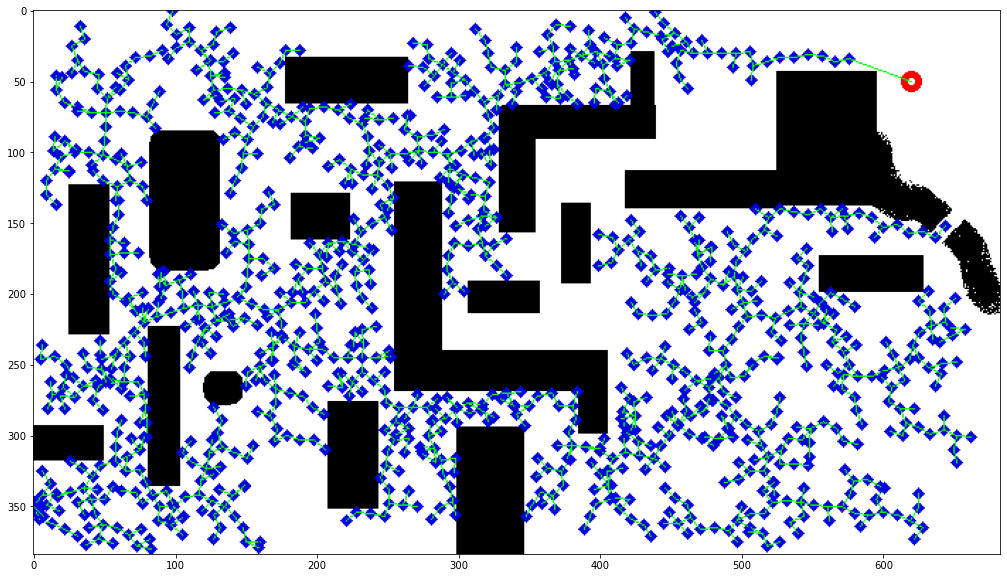

In [22]:
plt.figure(figsize=(18,10))
plt.imshow(newImg)
plt.savefig("RTT.png")